In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle as pkl
# import seaborn as sns
# sns.set_style("darkgrid")

In [14]:
with open("../wiki-Vote.txt",'r') as f:
    values = f.readlines()
values = values[4:]

s = set()
for edges in values:
    u,v = edges.split('\t')
    s.add(int(u))
    s.add(int(v))
print("Number of Nodes- ")
len(s)

Number of Nodes- 


7115

In [15]:
adjacency_matrix = np.zeros((len(s),len(s)))
mapping = {}
edge_list = []
counter=0
for edges in values:
    u,v = edges.split('\t')
    u,v = int(u),int(v)
    edge_list.append((u,v))

    if u in mapping:
        if v in mapping:
            adjacency_matrix[mapping[u]][mapping[v]]=1
        else:
            mapping[v] = counter
            counter+=1
            adjacency_matrix[mapping[u]][mapping[v]]=1
    else:
        mapping[u] = counter
        counter+=1
        if v in mapping:
           adjacency_matrix[mapping[u]][mapping[v]]=1
        else:
            mapping[v] = counter
            counter+=1
            adjacency_matrix[mapping[u]][mapping[v]]=1
        
edge_list = np.array(edge_list)

In [16]:
print("Number of Edges are- ")
len(edge_list)

Number of Edges are- 


103689

In [17]:
reverse_mapping = {y:x for x,y in mapping.items()}

In [18]:
print("The Edge List is- ")
edge_list

The Edge List is- 


array([[  30, 1412],
       [  30, 3352],
       [  30, 5254],
       ...,
       [8150, 8275],
       [8150, 8276],
       [8274, 8275]])

In [19]:
print("The Adjacency Matrix is- ")
adjacency_matrix

The Adjacency Matrix is- 


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
in_degree = np.sum(adjacency_matrix,axis=0)
out_degree = np.sum(adjacency_matrix,axis=1)

In [21]:
avg_in_degree = np.average(in_degree)
avg_out_degree = np.average(out_degree)

print("Average In degree and Out degree are-")
avg_in_degree,avg_out_degree

Average In degree and Out degree are-


(14.573295853829936, 14.573295853829936)

In [22]:
print("Node with Maximum In degree and Out Degree is-")
reverse_mapping[np.argmax(in_degree)],reverse_mapping[np.argmax(out_degree)]

Node with Maximum In degree and Out Degree is-


(4037, 2565)

In [23]:
density = len(edge_list)/(len(s)*(len(s)-1))
print("Density of the Graph is-")
density

Density of the Graph is-


0.0020485375110809584

In [24]:
in_distribution = {}
out_distribution = {}

for nodes,i in enumerate(in_degree):
    if i in in_distribution:
        in_distribution[i]+=1
    else:
        in_distribution[i]=1
    
for nodes,i in enumerate(out_degree):
    if i in out_distribution:
        out_distribution[i]+=1
    else:
        out_distribution[i]=1

in_distribution = {k:v/len(s) for k,v in in_distribution.items()}
in_distribution = {x[0]:x[1] for x in sorted(in_distribution.items(),key= lambda x: x[0])}
out_distribution = {k:v/len(s) for k,v in out_distribution.items()}
out_distribution = {x[0]:x[1] for x in sorted(out_distribution.items(),key= lambda x: x[0])}

<BarContainer object of 238 artists>

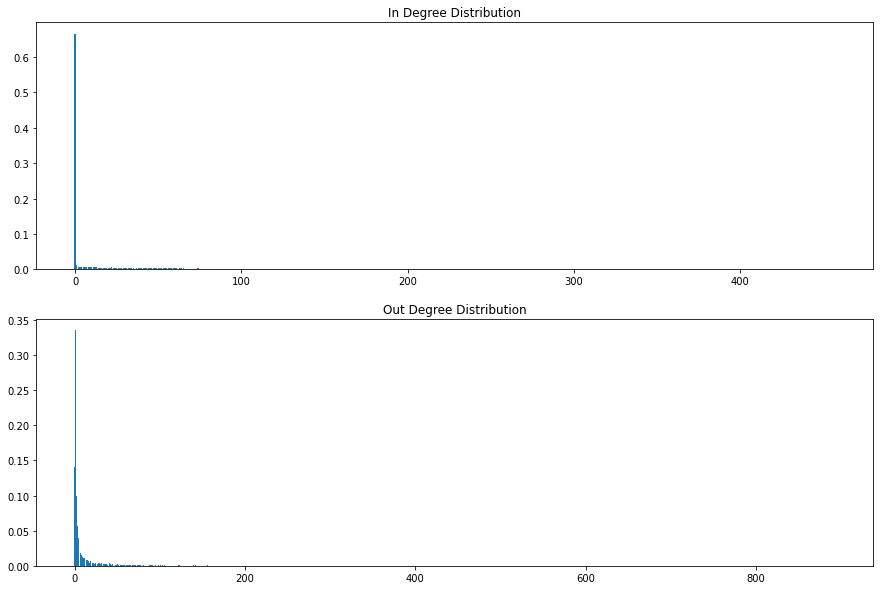

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,10))
ax1.set_title("In Degree Distribution")
ax2.set_title("Out Degree Distribution")
# ax1 = sns.barplot(x=np.array(list(in_distribution.keys())),y=np.array(list(in_distribution.values()))).set(xlabel='Degree', ylabel='Fraction Distribution')
ax1.bar(in_distribution.keys(),in_distribution.values())
# ax2 = sns.barplot(x=np.array(list(out_distribution.keys())),y=np.array(list(out_distribution.values()))).set(xlabel='Degree', ylabel='Fraction Distribution')
ax2.bar(out_distribution.keys(),out_distribution.values())

In [26]:
clustering_coeff = np.zeros(len(s))

for nodes in mapping:
    k = set()
    neg = 0
    for i,adlist in enumerate(adjacency_matrix[mapping[nodes]]):
        if adlist==1:
            k.add(i)
            neg+=1
    
    for i,adlist in enumerate(adjacency_matrix[:,mapping[nodes]]):
        if adlist==1:
            k.add(i)
            neg+=1
    k = len(k)
    if k<2:
        clustering_coeff[mapping[nodes]] = 0
    else:
        clustering_coeff[mapping[nodes]] = neg/(k*(k-1))

<BarContainer object of 7115 artists>

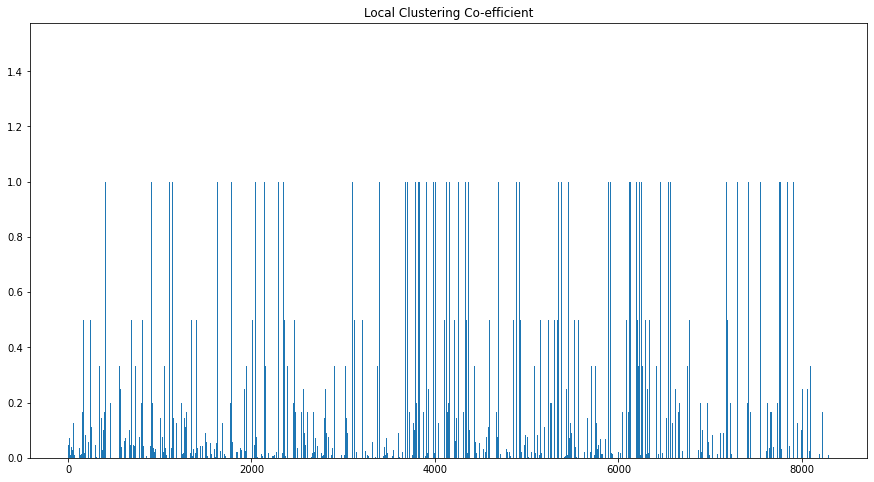

In [27]:
fig, ax1 = plt.subplots(1, 1,figsize=(15,8))
ax1.set_title("Local Clustering Co-efficient")
ax1.bar(reverse_mapping.values(),clustering_coeff)